In [1]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import os.path
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import pos_tag
import numpy as np
import re
import math
import pandas as pd
import csv
import pickle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, Dense, Dropout, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from langdetect import detect
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\babyj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\babyj\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\babyj\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
emoji_dict = {}
with open('emoji.txt', 'r', encoding='latin-1') as emoji_file:
    for line in emoji_file:
        line = line.strip()
        if line:
            emoji, value = line.split('\t')
            emoji_dict[emoji] = int(value)

In [3]:
def replace_emojis(text, emoji_dict):
    for emoji, value in emoji_dict.items():
        if value == 1:
            text = re.sub(re.escape(emoji), 'happy', text)
        elif value == -1:
            text = re.sub(re.escape(emoji), 'sad', text)
    return text

In [4]:
#vincent
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None
    
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
    words = word_tokenize(text)
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]
    lemmatizer = WordNetLemmatizer()
    tagged = pos_tag(words)
    words = [lemmatizer.lemmatize(word, pos=get_wordnet_pos(pos)) if get_wordnet_pos(pos) else word for word, pos in tagged]
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

hatefulCorpus=[]
nHatefulCorpus=[]
neutralCorpus=[]
with open("firstIter.csv", "r", encoding="utf-8") as file:
    reader = csv.DictReader(file)
    for row in reader:
        if not all(value == "" for value in row.values()):
            text = row["Comment Text"]
            if text == "":
                continue
            label = row["Label"]
            if label == "":
                continue
            try:
                lang=detect(text)
            except:
                lang = ""
            if lang != "en":
                continue
            newText = text.strip()
            newText = replace_emojis(newText, emoji_dict)
            newText = preprocess_text(newText)
            if label=='Neutral':
                neutralCorpus.append(newText)
            elif label=='Hateful':
                hatefulCorpus.append(newText)
            else:
                nHatefulCorpus.append(newText)

In [5]:
#all_texts = hatefulCorpus + nHatefulCorpus + neutralCorpus
# Create frequency distribution
#word_freq = FreqDist()

#for text in all_texts:
#    words = text.split()
#    word_freq.update(words)
#known_words = {word for word, freq in word_freq.items() if freq > 3}
#len(known_words)

1060

In [11]:
#total_words = 0
#num_comments = len(all_texts)

#for comment in all_texts:
#    total_words += len(comment.split())

#average_words = total_words / num_comments

#variance = 0
#for comment in all_texts:
#    num_words = len(comment.split())
#    variance += (num_words - average_words) ** 2

#std_deviation = math.sqrt(variance / num_comments)
#M = round(average_words + std_deviation)

#def comment_to_vector(comment, known_words, M):
#    words = comment.split()
#    vector = []
#    for i in range(M):
#        if i < len(words):
#            word = words[i]
#            if word in known_words:
#                vector.append(known_words.index(word) + 1)
#            else:
#                vector.append(0)
#        else:
#            vector.append(0)
#    return vector

# Convert preprocessed comments to vector representation
#hateful_comment_vectors = []
#for comment in hatefulCorpus:
#    vector = comment_to_vector(comment, list(known_words), M)
#    hateful_comment_vectors.append(vector)
    

#nHateful_comment_vectors = []
#for comment in nHatefulCorpus:
#    vector = comment_to_vector(comment, list(known_words), M)
#    nHateful_comment_vectors.append(vector)
#    
#neutral_comment_vectors = []
#for comment in neutralCorpus:
#    vector = comment_to_vector(comment, list(known_words), M)
#    neutral_comment_vectors.append(vector)

In [12]:
#from tensorflow.keras.layers import Dense
#from tensorflow.keras.utils import to_categorical
#hateful_comment_vectors = np.array(hateful_comment_vectors)
#nHateful_comment_vectors = np.array(nHateful_comment_vectors)
#neutral_comment_vectors = np.array(neutral_comment_vectors)

#all_comment_vectors = np.concatenate((hateful_comment_vectors, nHateful_comment_vectors, neutral_comment_vectors))

#hateful_labels = np.ones(len(hatefulCorpus))
#nHateful_labels = np.zeros(len(nHatefulCorpus))
#neutral_labels = np.full(len(neutralCorpus), 2)

#all_labels = np.concatenate((hateful_labels, nHateful_labels, neutral_labels))

#num_classes = 3

#X_train, X_test, y_train, y_test = train_test_split(all_comment_vectors, all_labels, test_size=0.2, random_state=42)
#y_train_one_hot = to_categorical(y_train, num_classes)
#y_test_one_hot = to_categorical(y_test, num_classes)

#embedding_dim = 40


#model = Sequential()
#model.add(Embedding(input_dim=len(known_words) + 1, output_dim=embedding_dim, input_length=M))
#model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
#model.add(Dropout(0.5))
#model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
#model.add(Dropout(0.5))
#model.add(Dense(units=50, activation='relu'))
#model.add(Dropout(0.5))
#model.add(Flatten())
#model.add(Dense(units=num_classes, activation='softmax'))

#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#early_stopping = EarlyStopping(monitor='val_loss', patience=3)

#model.fit(X_train, y_train_one_hot, epochs=20, batch_size=32, validation_data=(X_test, y_test_one_hot), callbacks=[early_stopping])

#model.save('savedModels/CNN_Model')


Epoch 1/20
32/32 [==============================] - 2s 15ms/step - loss: 1.0141 - accuracy: 0.5522 - val_loss: 0.9664 - val_accuracy: 0.6040
Epoch 2/20
32/32 [==============================] - 0s 8ms/step - loss: 0.9939 - accuracy: 0.5562 - val_loss: 0.9446 - val_accuracy: 0.6040
Epoch 3/20
32/32 [==============================] - 0s 8ms/step - loss: 0.9837 - accuracy: 0.5562 - val_loss: 0.9542 - val_accuracy: 0.6040
Epoch 4/20
32/32 [==============================] - 0s 9ms/step - loss: 0.9633 - accuracy: 0.5562 - val_loss: 0.9600 - val_accuracy: 0.6040
Epoch 5/20
32/32 [==============================] - 0s 9ms/step - loss: 0.9289 - accuracy: 0.5562 - val_loss: 0.9433 - val_accuracy: 0.6040
Epoch 6/20
32/32 [==============================] - 0s 9ms/step - loss: 0.8576 - accuracy: 0.5562 - val_loss: 0.9511 - val_accuracy: 0.6040
Epoch 7/20
32/32 [==============================] - 0s 9ms/step - loss: 0.8066 - accuracy: 0.5763 - val_loss: 0.9494 - val_accuracy: 0.6000
Epoch 8/20
32/32 [=

INFO:tensorflow:Assets written to: savedModels/CNN_Model\assets


INFO:tensorflow:Assets written to: savedModels/CNN_Model\assets


In [39]:
#import tensorflow as tf
#import keras
#testData = "All immigrants should be deported to where they came from."
#testData = testData.strip()
#testData = replace_emojis(testData, emoji_dict)
#testData = preprocess_text(testData)
#testDataVector = comment_to_vector(testData, list(known_words), 40)
#testDataVector = np.array(testDataVector)
#testDataVector = np.expand_dims(testDataVector, axis=0)
#loadedModel = tf.keras.models.load_model('savedModels/CNN_Model')
#predicted_probabilities = loadedModel.predict(testDataVector)
#predicted_class = np.argmax(predicted_probabilities)
#class_labels = ['hateful', 'non-hateful', 'neutral']
#print(class_labels[predicted_class])

1/1 [==============================] - 0s 79ms/step
hateful


## Implementing CNN using Glove Embedding

In [5]:
hatefulCorpus = hatefulCorpus[:272]
print("nutral = "+str(len(neutralCorpus))+" nhateful = "+str(len(nHatefulCorpus))+" hateful = "+str(len(hatefulCorpus)))

nutral = 267 nhateful = 273 hateful = 272


In [6]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

MAX_NB_WORDS = 20000
MAX_SEQUENCE_LENGTH = 100
training_corpus=hatefulCorpus + nHatefulCorpus + neutralCorpus

embeddings_index = {}

#Download Glove from http://nlp.stanford.edu/data/glove.6B.zip
with open('glove.6B.100d.txt', 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(training_corpus)
word_index = tokenizer.word_index

with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
    
X = tokenizer.texts_to_sequences(training_corpus)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)

y = np.array([0] * len(hatefulCorpus) + [1] * len(nHatefulCorpus) + [2] * len(neutralCorpus))
y = to_categorical(y, num_classes=3)
size = len(word_index)
embedding_matrix = np.zeros((size + 1, 100))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
        
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

def create_model(optimizer='adam', filters=32, kernel_size=3, dropout_rate=0.5):
    model = Sequential()
    model.add(Embedding(size + 1, 100, weights=[embedding_matrix], input_length=MAX_SEQUENCE_LENGTH, trainable=False))
    model.add(Conv1D(filters, kernel_size, activation='relu'))
    model.add(MaxPooling1D(3))
    model.add(Dropout(dropout_rate))
    model.add(Conv1D(filters*2, kernel_size, activation='relu'))
    model.add(MaxPooling1D(5))
    model.add(Dropout(dropout_rate))
    model.add(Flatten())
    model.add(Dense(filters*2, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

#model = KerasClassifier(build_fn=create_model, verbose=0)

#param_grid = {
#    'optimizer': ['adam', 'rmsprop'],
#    'filters': [16, 32, 64, 128],
#    'kernel_size': [3, 5],
#    'dropout_rate': [0.3, 0.5]
#}

#grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)

#grid_result = grid.fit(X_train, y_train)

#print("Best Parameters: ", grid_result.best_params_)
#print("Best Score: ", grid_result.best_score_)

early_stopping = EarlyStopping(monitor='val_loss', patience=3)
model = create_model(optimizer='adam', filters=16, kernel_size=3, dropout_rate=0.3)
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32, callbacks=[early_stopping])
model.save('savedModels/CNN_Model')

y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)
report = classification_report(y_true, y_pred_classes)
print(report)

Epoch 1/20
21/21 [==============================] - 2s 27ms/step - loss: 1.1056 - accuracy: 0.3652 - val_loss: 1.1046 - val_accuracy: 0.4417
Epoch 2/20
21/21 [==============================] - 0s 12ms/step - loss: 1.0951 - accuracy: 0.3744 - val_loss: 1.1025 - val_accuracy: 0.3742
Epoch 3/20
21/21 [==============================] - 0s 11ms/step - loss: 1.0839 - accuracy: 0.4006 - val_loss: 1.0990 - val_accuracy: 0.4172
Epoch 4/20
21/21 [==============================] - 0s 11ms/step - loss: 1.0856 - accuracy: 0.3945 - val_loss: 1.0929 - val_accuracy: 0.4540
Epoch 5/20
21/21 [==============================] - 0s 11ms/step - loss: 1.0736 - accuracy: 0.4330 - val_loss: 1.0910 - val_accuracy: 0.4601
Epoch 6/20
21/21 [==============================] - 0s 11ms/step - loss: 1.0622 - accuracy: 0.4407 - val_loss: 1.0847 - val_accuracy: 0.4601
Epoch 7/20
21/21 [==============================] - 0s 11ms/step - loss: 1.0589 - accuracy: 0.4268 - val_loss: 1.0802 - val_accuracy: 0.4417
Epoch 8/20
21

INFO:tensorflow:Assets written to: savedModels/CNN_Model\assets


INFO:tensorflow:Assets written to: savedModels/CNN_Model\assets


6/6 [==============================] - 0s 8ms/step
              precision    recall  f1-score   support

           0       0.50      0.63      0.56        52
           1       0.38      0.30      0.33        54
           2       0.51      0.49      0.50        57

    accuracy                           0.47       163
   macro avg       0.46      0.47      0.46       163
weighted avg       0.46      0.47      0.46       163



In [12]:
testText = "All immigrants should be deported to where they came from."
testSequence = tokenizer.texts_to_sequences([testText])
testSequence = pad_sequences(testSequence, maxlen=MAX_SEQUENCE_LENGTH)
loadedModel = tf.keras.models.load_model('savedModels/CNN_Model')
prediction = loadedModel.predict(testSequence)
predictedClass = np.argmax(prediction)
print(f"The predicted class for '{testText}' is: {predictedClass}")

1/1 [==============================] - 0s 148ms/step
The predicted class for 'All immigrants should be deported to where they came from.' is: 0


In [11]:
import random

num_texts = 50  # Number of texts to fetch

testCorpus = []
with open("firstIter.csv", "r", encoding="utf-8") as file:
    reader = csv.DictReader(file)
    texts = [row["Comment Text"] for row in reader if row["Comment Text"]]
    print(texts[:num_texts])
    random.shuffle(texts)  # Shuffle the texts randomly
    for text in texts[:num_texts]:
        try:
            lang = detect(text)
        except:
            lang = ""
        if lang == "en":
            newText = text.strip()
            newText = replace_emojis(newText, emoji_dict)
            newText = preprocess_text(newText)
            testCorpus.append(newText)

['Bring us victory for all europeans', "Is Ireland having a low birthrate problem?? So they are welcoming immigrants from everywhere. These migrants dont come to Ireland to become an Irish citizen, they just want free stuff and want to take over neighborhoods that were Irish for thousands of years. Is England the problem with its immigration policies?? England has always tried to force its will von Ireland. Countries in Europe need to come together and form a new country with closed borders, including a fuel abundant nation. Purge out all the migrants that don't picth in, including violent prisoners from outside countries. I some small protests happening that the media calls white supremacists. Being a proud iresh person is called a racist. Here in the states your name a white supremacist for hanging the nations flag on your property, celebrateing the 4th of July, going to church and believing in God. Oh lets not forget being a white male , makes you a bigot, oh wait our president is a

45
2/2 [==============================] - 0s 4ms/step
{'Hateful': 17, 'Non-Hateful': 12, 'Neutral': 16}


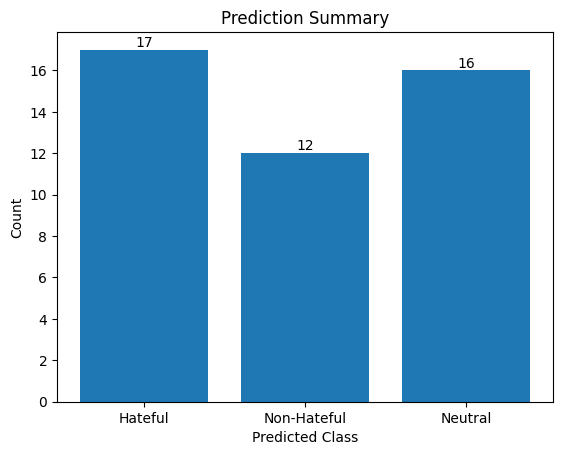

In [10]:
MAX_SEQUENCE_LENGTH = 100
class_labels = ['Hateful', 'Non-Hateful', 'Neutral']
print(len(testCorpus))

# Load the tokenizer from the saved file
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

# Preprocess the test corpus
input_sequences = tokenizer.texts_to_sequences(testCorpus)
padded_sequences = tf.keras.preprocessing.sequence.pad_sequences(input_sequences, maxlen=MAX_SEQUENCE_LENGTH)

# Load the model
loaded_model = tf.keras.models.load_model('savedModels/CNN_Model')

# Make predictions on the padded sequences
predictions = loaded_model.predict(padded_sequences)
predicted_classes = np.argmax(predictions, axis=1)

# Count the predictions for each class
prediction_summary = {label: 0 for label in class_labels}
for predicted_class in predicted_classes:
    predicted_label = class_labels[predicted_class]
    prediction_summary[predicted_label] += 1

print(prediction_summary)
# Prepare data for bar chart
labels = list(prediction_summary.keys())
values = list(prediction_summary.values())

# Plot the bar chart
plt.bar(labels, values)
plt.xlabel('Predicted Class')
plt.ylabel('Count')
plt.title('Prediction Summary')
for i, v in enumerate(values):
    plt.text(i, v, str(v), ha='center', va='bottom')
plt.show()


In [14]:
padded_sequences[3]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  25,  20,   2,
       861, 340, 665,  32, 455,  20, 460,  26,  84])